## Fitting the parameters

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objs as go
import plotly
plotly.__version__

'4.5.0'

In [2]:
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize'] = (16,12)

In [3]:
dataPath_Raw = ("data/COVID_Flat_Table.csv")
#dataPath_Processed = ("../data/processed/")

pd.set_option("display.max_rows", 500)

In [4]:
df_analyse = pd.read_csv(dataPath_Raw, sep=",")
df_analyse.sort_values('date', ascending = True).head()

,date,Italy,US,Spain,Germany,India,"Korea, South",China,Brazil
0,2020-01-22,0,1,0,0,0,1,548,0
1,2020-01-23,0,1,0,0,0,1,643,0
2,2020-01-24,0,2,0,0,0,2,920,0
3,2020-01-25,0,2,0,0,0,2,1406,0
4,2020-01-26,0,5,0,0,0,3,2075,0


In [5]:
from scipy import optimize
from scipy import integrate

In [6]:
ydata = np.array(df_analyse.Germany[70:])   #90
time = np.arange(len(ydata))
print(len(ydata))

71


In [7]:
N0 = 8300000
beta = 0.4
gamma = 0.1

I0 = ydata[0]
S0 = N0 - I0
R0 = 0

print(S0)

8222128


In [8]:
def SIR_model(SIR, time, beta, gamma):
    
    S,I,R = SIR
    dS = -beta * S * I/N0
    dI = beta * S * I/N0 - gamma * I
    dR = gamma * I
    
    return([dS, dI, dR])
    

In [9]:
def fit_odeint(x,beta,gamma):
    return integrate.odeint(SIR_model, (S0,I0,R0), time, args=(beta, gamma))[:,1]

# [,:1] infected rate

In [10]:
# Integrate
# Parameters Optimized

popt = [beta, gamma]  #beta, gamma

fit_odeint(time, *popt)

array([  77872.        ,  104636.46854093,  140318.52645465,
        187666.90662285,  250105.15644037,  331765.03424878,
        437409.93054506,  572162.43996675,  740931.67986716,
        947451.60999907, 1192930.09414865, 1474500.51336669,
       1783937.19682648, 2107302.17555693, 2426102.53514237,
       2720012.98816957, 2970448.30885748, 3163762.72266084,
       3293014.8880204 , 3357956.60417629, 3363657.82631613,
       3318534.7585679 , 3232458.97507447, 3115321.67391978,
       2976139.66843463, 2822620.48808003, 2661046.8537144 ,
       2496349.88637047, 2332274.33772238, 2171573.85252414,
       2016202.02960209, 1867482.6724158 , 1726253.55663202,
       1592983.73178758, 1467867.03344325, 1350895.41301424,
       1241915.74747434, 1140673.42378908, 1046845.50754586,
        960065.76380822,  879943.38579983,  806076.86895929,
        738064.16057689,  675509.96278944,  618030.86715527,
        565258.84434271,  516843.49165606,  472453.34829913,
        431776.51640741,

In [11]:
popt, pcov = optimize.curve_fit(fit_odeint, time, ydata)
perr = np.sqrt(np.diag(pcov))

In [12]:
print('Standard deviation errors : ', str(perr), 'Infection Start : ', ydata[0])


Standard deviation errors :  [0.00242826 0.00142112] Infection Start :  77872


In [13]:
fitted = fit_odeint(time, *popt)

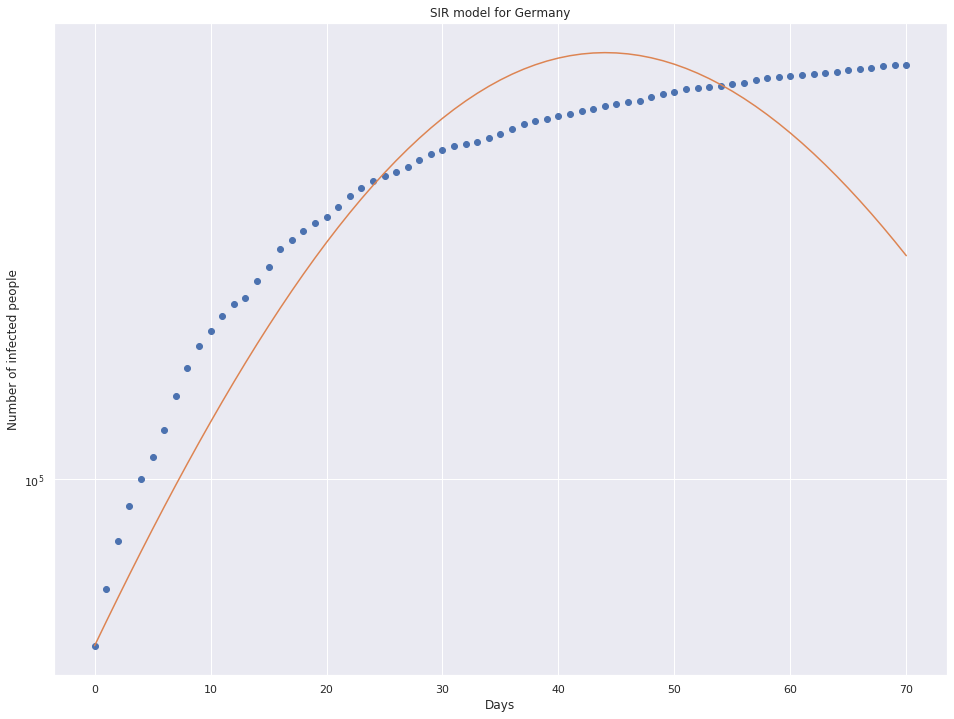

Optimal Parameters : beta =  0.22858433770601874 gamma =  0.1900944201343775
Reproduction number, R0 :  1.2024778925358923


In [14]:
plt.semilogy(time, ydata, 'o')
plt.semilogy(time, fitted)
plt.title('SIR model for Germany')
plt.ylabel('Number of infected people')
plt.xlabel('Days')
plt.show()

print('Optimal Parameters : beta = ', popt[0], 'gamma = ', popt[1])
print('Reproduction number, R0 : ', popt[0]/popt[1])

## Dynamic Beta 

In [15]:
t_initial = 22
t_intro_measures = 16
t_hold = 21
t_relax = 21

beta_max = 0.04
beta_min = 0.011
gamma = 0.01


pd_beta = np.concatenate((np.array(t_initial*[beta_max]),
                          np.linspace(beta_max, beta_min, t_intro_measures),
                          np.array(t_hold * [beta_min]),
                          np.linspace(beta_min, beta_max, t_relax)
                        ))

pd_beta

array([0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.04      , 0.04      ,
       0.04      , 0.04      , 0.04      , 0.03806667, 0.03613333,
       0.0342    , 0.03226667, 0.03033333, 0.0284    , 0.02646667,
       0.02453333, 0.0226    , 0.02066667, 0.01873333, 0.0168    ,
       0.01486667, 0.01293333, 0.011     , 0.011     , 0.011     ,
       0.011     , 0.011     , 0.011     , 0.011     , 0.011     ,
       0.011     , 0.011     , 0.011     , 0.011     , 0.011     ,
       0.011     , 0.011     , 0.011     , 0.011     , 0.011     ,
       0.011     , 0.011     , 0.011     , 0.011     , 0.011     ,
       0.01245   , 0.0139    , 0.01535   , 0.0168    , 0.01825   ,
       0.0197    , 0.02115   , 0.0226    , 0.02405   , 0.0255    ,
       0.02695   , 0.0284    , 0.02985   , 0.0313    , 0.03275

In [16]:
SIR = np.array([S0,I0,R0])

propagation_rates = pd.DataFrame(columns={'Susceptible':S0,
                                          'Infected':I0,
                                          'Recovered':R0                                                  
                                         })
                                 
for each_beta in pd_beta:
    new_delta_vector = SIR_model(SIR, time, each_beta, gamma)
    SIR = SIR + new_delta_vector
    
    propagation_rates = propagation_rates.append({'Susceptible':SIR[0],
                                                  'Infected':SIR[1],
                                                  'Recovered':SIR[2],                         
                                                },ignore_index=True
                                                )
                                 



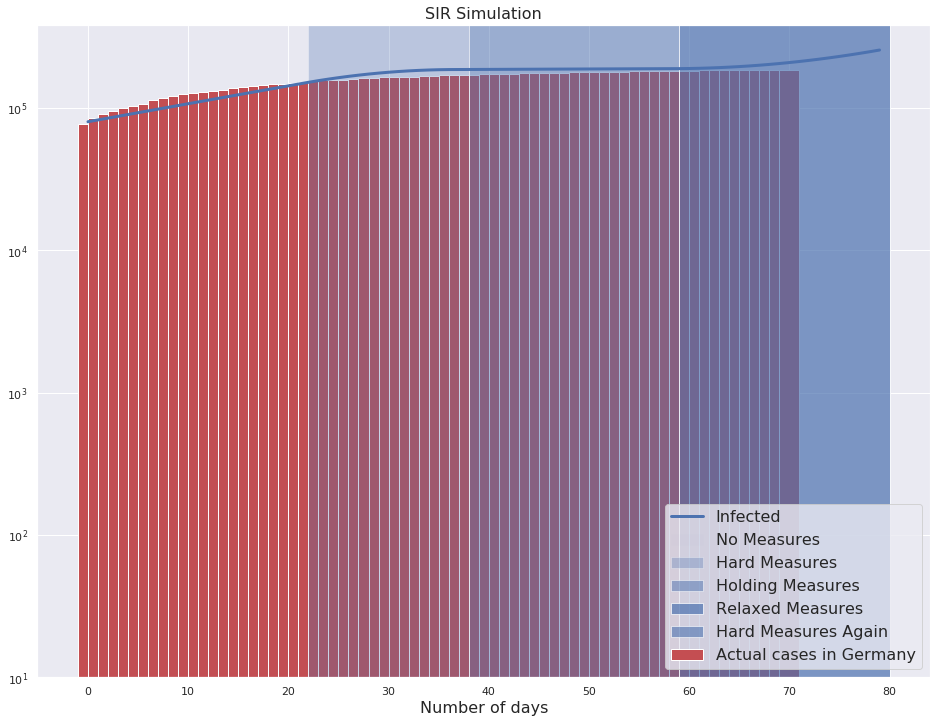

In [17]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.Infected, label = 'Infected', linewidth = 3)

ax1.bar(np.arange(len(ydata)), ydata, width=2, label = 'Actual cases in Germany', color = 'r')
t_phases = np.array([t_initial, t_intro_measures, t_hold, t_relax]).cumsum()

ax1.axvspan(0, t_phases[0], facecolor='b', alpha=0.01, label="No Measures")
ax1.axvspan(t_phases[0], t_phases[1], facecolor='b', alpha=0.3, label="Hard Measures")
ax1.axvspan(t_phases[1], t_phases[2], facecolor='b', alpha=0.5, label="Holding Measures")
ax1.axvspan(t_phases[2], t_phases[3], facecolor='b', alpha=0.7, label="Relaxed Measures")
ax1.axvspan(t_phases[3], len(propagation_rates.Infected),facecolor='b', alpha=0.6, label="Hard Measures Again")

ax1.set_ylim(10,1.5*max(propagation_rates.Infected))
#ax1.set_xlim(0,100)
ax1.set_yscale('log')
ax1.set_title('SIR Simulation', size= 16)
ax1.set_xlabel('Number of days', size=16)
ax1.legend(loc='best',
          prop={'size':16})